# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************

On doit résoudre le système : [5*x^4 - 10*x^3 + 10*x^2*y^2 - 40*x^2*y + 40*x^2 - 10*x*y^2 + 40*x*y - 32*x + 5*y^4 - 40*y^3 + 115*y^2 - 136*y + 48, 20*x^3 - 30*x^2 + 20*x*y^2 - 80*x*y + 80*x - 10*y^2 + 40*y - 32, 20*x^2*y - 40*x^2 - 20*x*y + 40*x + 20*y^3 - 120*y^2 + 230*y - 136]  = [0,0,0]
On calcule une base de Groebner de f,df1,df2, G =  [x - 3/4*y + 1, y^2 - 24/5*y + 144/25]

On remarque que le polynôme g =  y^2 - 24/5*y + 144/25  de la base est uniquement en y
Ses racines sont : [12/5]
On peut ensuite insérer ces valeurs dans l'autre polynôme de la base et on obtient la liste des points d'inflexions
La liste des points d'inflexions est : [(4/5, 12/5)]


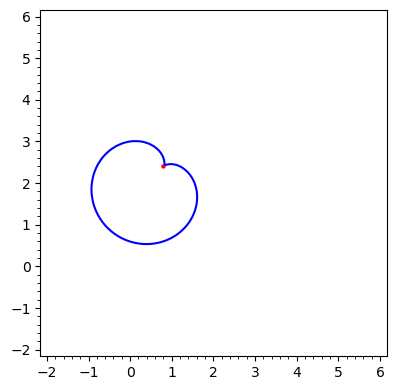

In [10]:
reset()
print("""\
# ****************************************************************************
# POINTS SINGULIERS 
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y> = PolynomialRing(QQ,2,order = "lex")
f = 5*x^4 - 10*x^3 + 10*x^2*y^2 - 40*x^2*y + 40*x^2 - 10*x*y^2 + 40*x*y - 32*x + 5*y^4 - 40*y^3 + 115*y^2 - 136*y + 48

# Code pour l'EXERCICE

Df = f.gradient()
df1,df2 = Df[0],Df[1]

J = Ideal([f,df1,df2])

base = J.groebner_basis()

g = base[-1].univariate_polynomial()
racines_y = [racine_y for racine_y,_ in g.roots()]
r = racines_y[0]
PtsSinguliers = [(racine_x,r) for racine_x,_ in base[0].subs(y=r).univariate_polynomial().roots()]# A calculer


# # Affichage des resultats
print("On doit résoudre le système :",[f,df1,df2]," = [0,0,0]")
print("On calcule une base de Groebner de f,df1,df2, G = " ,base)
print("")
print("On remarque que le polynôme g = ",g," de la base est uniquement en y")
print("Ses racines sont :",racines_y)
print("On peut ensuite insérer ces valeurs dans l'autre polynôme de la base et on obtient la liste des points d'inflexions")
print("La liste des points d'inflexions est :",PtsSinguliers)
G1 = implicit_plot(f,(x,-2,6),(y,-2,6),color='blue')
G2 = points(PtsSinguliers,color='red')
show(G1+G2)


In [53]:
reset()
print("""\
# ****************************************************************************
#  VALUATIONS
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

A.<x,y,z> = AffineSpace(QQ, 3)
QQ5.<rac5> = QuadraticField(5)
f1 = x^2+y^2-1
f2 = 5*x-(z-3)^2
Z = Curve([f1,f2],A)
n = z^2-6*z+5
d = x^2-x+y^2

# Code pour l'EXERCICE

g1,g2,g3 = vector(f1.gradient()).cross_product(vector(f2.gradient()))

base = Ideal([g1,g2,g3,f1,f2]).groebner_basis()

reponse2="La base de Groebner du système est [1], donc il n'existe pas de zéros du système, i.e. que nabla f ^ nabla g != 0 pour tout point de la courbe. La courbe est donc lisse."

I = Ideal(f1,f2,n)
baseI = I.groebner_basis()
zeros_sans_ordre = [(racine_x,racine_y,racine_z) for racine_x,_ in baseI[2].univariate_polynomial().roots(QQ5) 
         for racine_y,_ in baseI[0].univariate_polynomial().roots(QQ5) 
         for racine_z,_ in baseI[1].univariate_polynomial().roots(QQ5)]

e = f1.degree()*f2.degree()*n.degree()

zeros = []

for r_x,r_y,r_z in zeros_sans_ordre:
    v = (x-r_x) + (y-r_y) + (z-r_z) # ne s'annule sur aucun point zéro commun à l'idéal par lequel est défini Z
    v = v^e
    K = Ideal(f1,f2,n,v)
    ordre = len(K.normal_basis())
    zeros.append(((r_x,r_y,r_z),ordre))
    

J = Ideal(f1,f2,d)
baseJ = J.groebner_basis()
poles_sans_ordre = [(racine_x,racine_y,racine_z) for racine_x,_ in baseJ[2].univariate_polynomial().roots(QQ5) 
         for racine_y,_ in baseJ[0].univariate_polynomial().roots(QQ5) 
         for racine_z,_ in baseJ[1].univariate_polynomial().roots(QQ5)]

e = f1.degree()*f2.degree()*d.degree()

poles = []

for r_x,r_y,r_z in poles_sans_ordre:
    v = (x-r_x) + (y-r_y) + (z-r_z) # ne s'annule sur aucun point zéro commun à l'idéal par lequel est défini Z
    v = v^e
    K = Ideal([f1,f2,d,v])
    ordre = len(K.normal_basis())
    poles.append(((r_x,r_y,r_z),ordre))

    
var('theta')
x(theta) = theta
y(theta) = theta^2
z(theta) = theta^3
# # Affichage des resultats

G = parametric_plot3d((x,y,z),(theta,0,2))


print(reponse2)
print("Confirmation de la lissité de la courbe : ", Z.is_smooth())

print("L'ensemble des zeros munis de leur multiplicité de h est",zeros)
print("L'ensemble des poles munis de leur multiplicité de h est",poles)
show(G)

# ****************************************************************************
#  VALUATIONS
# ****************************************************************************

La base de Groebner du système est [1], donc il n'existe pas de zéros du système, i.e. que nabla f ^ nabla g != 0 pour tout point de la courbe. La courbe est donc lisse.
Confirmation de la lissité de la courbe :  True
L'ensemble des zeros munis de leur multiplicité de h est [((4/5, 3/5, 5), 1), ((4/5, 3/5, 1), 1), ((4/5, -3/5, 5), 1), ((4/5, -3/5, 1), 1)]
L'ensemble des poles munis de leur multiplicité de h est [((1, 0, rac5 + 3), 2), ((1, 0, -rac5 + 3), 2)]


Graphics3d Object

# ****************************************************************************
#  ENVELOPPE
# ****************************************************************************

La courbe (Ct) est un cercle de rayon 2 dont le centre décrit une parabole d'équation (-t^2+4t) quand t varie
L'enveloppe de la famille de courbe a pour equation y^4 + 2*x^2*y^3 - 8*x*y^3 + 1/2*y^3 + x^4*y^2 - 8*x^3*y^2 - 6*x^2*y^2 + 88*x*y^2 - 1535/16*y^2 - 11/2*x^4*y + 44*x^3*y + 81/8*x^2*y - 785/2*x*y + 486*y + x^6 - 12*x^5 + 865/16*x^4 - 225/2*x^3 - 76*x^2 + 692*x - 2897/4
Ct pour plusieurs valeurs de t


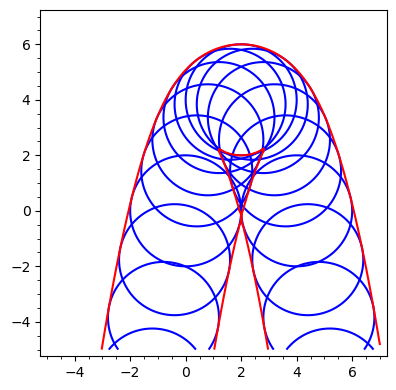

La bille expulsée tape-t-elle le toit ? A priori, les billes peuvent librement évoluer, elles effleurent le toit.


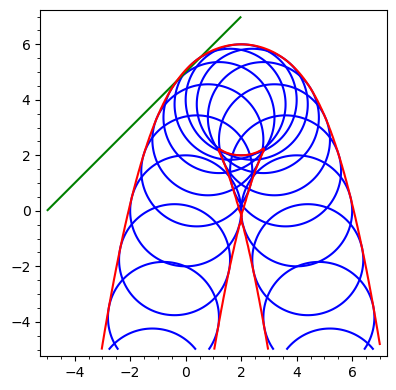

In [87]:
reset()
print("""\
# ****************************************************************************
#  ENVELOPPE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,t> = PolynomialRing(QQ,3,order = "invlex") # ORDRE DES VARIABLES A FIXER
f = (x-t)^2+(y+t^2-4*t)^2-4

# Code pour l'EXERCICE

reponse1 = "La courbe (Ct) est un cercle de rayon 2 dont le centre décrit une parabole d'équation (-t^2+4t) quand t varie"

I = Ideal(f,f.derivative(t))
base = I.groebner_basis()

eq_enveloppe = base[-1]
enveloppe(x,y) = eq_enveloppe
Cenv = implicit_plot(enveloppe,(x,-5,7),(y,-5,7),color = "red")
n = 5
T = [2*i/n for i in range(-n,4*n)]
G_CT = sum(implicit_plot(f(x,y,tt),(x,-5,7),(y,-5,7)) for tt in T)

reponse4 = "Difficile à dire avec la précision, il semblerait qu'il y ait une légère collision mais cela ressemble à un simple effleurement. Si on regarde bien, la courbe rouge semble déborder sur la verte (=> collision)"

# # Affichage des resultats

print(reponse1)

print("L'enveloppe de la famille de courbe a pour equation",eq_enveloppe)
show()
print("Ct pour plusieurs valeurs de t")

show(G_CT + Cenv)
print("La bille expulsée tape-t-elle le toit ?", reponse4)
show(G_CT + implicit_plot(x+5-y,(x,-5,7),(y,-5,7),color = "green") + Cenv)


# ****************************************************************************
#  COLORATION DE GRAPHES
# ****************************************************************************



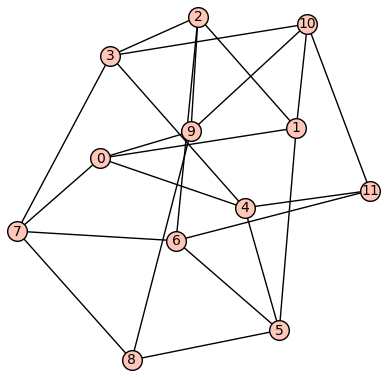

Il faut 3 couleurs pour colorer ce graphe
Une base de Groebner de I(G,3) est [x11 - x0, x10 + x1 + x0, x9 - x1, x8 - x0, x7 + x1 + x0, x6 - x1, x5 + x1 + x0, x4 - x1, x3 - x0, x2 + x1 + x0, x1^2 + x0*x1 + x0^2, x0^3 - 1]
On peut remarquer que le dernier polynôme de la base est en x0, l'avant dernier en x0,x1 etc... le premier en x11,...,x0. La base de Groebner a 'triangularisé' le système ainsi, si on fait les calculs on trouve que x1,...,x11 sont uniquement déterminés par x0. Quant à x0, nous sommes libres de le choisir parmi les racines troisième de l'unité (i.e. choisir la couleur que l'on souhaite au départ de notre tri-coloriage)


In [95]:
reset()
print("""\
# ****************************************************************************
#  COLORATION DE GRAPHES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

G= Graph(12)
G.add_cycle(range(8))
G.add_edges([(i,i+4) for i in range(4) ])
G.add_edges([(8,5),(8,7),(9,0),(9,2),(10,1), (10,3),(11,4),(11,6) ])
G.add_edges([(8,9),(9,10),(10,11)])
G.coloring()
G.show()


MPol = PolynomialRing(QQ,12,'x',
order = 'invlex')
phi (v) = v^3-1
psi (u,v) = u^2+u*v+v^2
IG= Ideal(MPol, [phi(MPol.gen(v)) for v in G.vertices()] + [psi(MPol.gen(u),MPol.gen(v)) for (u,v) in G.edges(labels=false)])

# Code pour l'EXERCICE

reponse1 = 3
base = IG.groebner_basis()
reponse3 = "On peut remarquer que le dernier polynôme de la base est en x0, l'avant dernier en x0,x1 etc... le premier en x11,...,x0. La base de Groebner a 'triangularisé' le système ainsi, si on fait les calculs on trouve que x1,...,x11 sont uniquement déterminés par x0. Quant à x0, nous sommes libres de le choisir parmi les racines troisième de l'unité (i.e. choisir la couleur que l'on souhaite au départ de notre tri-coloriage)"

# # Affichage des resultats

print("Il faut",reponse1,"couleurs pour colorer ce graphe")
print("Une base de Groebner de I(G,3) est", base)
print(reponse3)


In [3]:
reset()
print("""\
# ****************************************************************************
#  PREUVE DE THEOREMES GEOMETRIQUES
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<x,y,u,v> = PolynomialRing(QQ,4, order = "lex")


# Code pour l'EXERCICE
IA = Ideal(MPol,[(1+u)*y - v*x]) # médiane issue de A donc BM = MC
IB = Ideal(MPol,[(u-2)*y-v*(x-1)]) # médiane issue de B donc AM = MC 
IC = Ideal(MPol,[(2*u-1)*y-2*v*(x-1/2)]) # médiane issue de C donc AM = MB

reponse2  = "IA et IB sont des droites donc IA inter IB est vide ou bien un point, on peut remarquer que les droites sont dans un plan et ne sont pas parallèles, donc IA inter IB est un singleton. IA + IB est un plan."

reponse4 = "Les médianes d'un triangle se coupent en un unique point, elles sont concourantes."

# # Affichage des resultats

print("Les idéaux IA, IB et IC sont", IA, IB, IC)
print(reponse2)
print("3/ On peut réduit le polynôme (2*u-1)*y-2*v*(x-1/2) dans IA+IB : ",((2*u-1)*y-2*v*(x-1/2)).reduce(IA+IB))
print("On en déduit que la médiane C passe par l'intersection des droites qui engendrent IA et IB, i.e. le point d'intersection. ")
print(reponse4)


# ****************************************************************************
#  PREUVE DE THEOREMES GEOMETRIQUES
# ****************************************************************************

Les idéaux IA, IB et IC sont Ideal (-x*v + y*u + y) of Multivariate Polynomial Ring in x, y, u, v over Rational Field Ideal (-x*v + y*u - 2*y + v) of Multivariate Polynomial Ring in x, y, u, v over Rational Field Ideal (-2*x*v + 2*y*u - y + v) of Multivariate Polynomial Ring in x, y, u, v over Rational Field
IA et IB sont des droites donc IA inter IB est vide ou bien un point, on peut remarquer que les droites sont dans un plan et ne sont pas parallèles, donc IA inter IB est un singleton. IA + IB est un plan.
3/ On peut réduit le polynôme (2*u-1)*y-2*v*(x-1/2) dans IA+IB :  0
Les médianes sont d'un triangle se coupent en un unique point.


In [36]:
reset()
print("""\
# ****************************************************************************
#  PROGRAMMATION ENTIERE
# ****************************************************************************
""")


# Donnees de l'enonce de l'exercice

MPol.<p,n,d,q> = PolynomialRing(QQ,4,order = "deglex")
I=Ideal([p^5-n,p^10-d,p^25-q])

# Code pour l'EXERCICE

base = I.groebner_basis()
reponse2 = "X^k signifie dans notre modélisation que l'on met k de la pièce X. Les conditions sont là pour s'assurer qu'on n'utilise pas des P alors qu'on pourrait utiliser des N par exemple. Donc 5 Penny = 1 Nickel, ce qui correspond à P^5 - N = 0. Idem pour P^10 - D = 0 et P^25-Q = 0. Ces conditions permettent de dire qu'on prend toujours le minimum de monnaie, par exemple ne pas prendre 50 penny alors qu'on pouvait prendre 2 quarter. Dans cette base, réduire P^117 revient à réduire 117 penny sous les conditions évoquées. Cela renvoie bien la solution à notre problème. Ici, on chosit d'utiliser deglex pour que les polynômes dominants soient ceux qui 'convertissent' au mieux l'argent, i.e. P^25-Q doit être le plus dominant car il transforme 25 penny en 1 monnaie"

# # Affichage des resultats

print("Base de Groebner",base)
print((p^117).reduce(I))
print(reponse2)


# ****************************************************************************
#  PROGRAMMATION ENTIERE
# ****************************************************************************

Base de Groebner [p^5 - n, n*d^2 - q, d^3 - n*q, n^2 - d]
p^2*n*d*q^4
X^k signifie dans notre modélisation que l'on met k de la pièce X. Les conditions sont là pour s'assurer qu'on n'utilise pas des P alors qu'on pourrait utiliser des N par exemple. Donc 5 Penny = 1 Nickel, ce qui correspond à P^5 - N = 0. Idem pour P^10 - D = 0 et P^25-Q = 0. Ces conditions permettent de dire qu'on prend toujours le minimum de monnaie, par exemple ne pas prendre 50 penny alors qu'on pouvait prendre 2 quarter. Dans cette base, réduire P^117 revient à réduire 117 penny sous les conditions évoquées. Cela renvoie bien la solution à notre problème. Ici, on chosit d'utiliser deglex pour que les polynômes dominants soient ceux qui 'convertissent' au mieux l'argent, i.e. P^25-Q doit être le plus dominant car il transforme 25 pen

In [205]:
reset()
print("""\
# ****************************************************************************
#  SURFACE DE CLEBSCH
# ****************************************************************************
""")

# Donnees de l'enonce de l'exercice

MPol.<x1,x2,x3> = PolynomialRing(QQ,3)
eq=x1^3+x2^3+x3^3+1-(x1+x2+x3+1)^3

# Code pour l'EXERCICE

MMPol.<a,b,c,d,e,f,t> = PolynomialRing(QQ,7,order = "lex")

g1 = 1 + (a+d*t)^3 + (b + e*t)^3 + (c+f*t)^3
g2 = 1 + (a+d*t) + (b + e*t) + (c+f*t)
g3 = 1 + d + e + f
g4 = 1 + d^3 + e^3 + f^3

pol = [g1,g2,g3,g4]
J = Ideal(MMPol,pol)
base = J.groebner_basis()
ba = base.copy()

print(ba)

# # Affichage des resultats

print("1/  On peut naturellement plonger la surface de Clebsch dns la P^5(R), et en déduire que les équations sont alors équivalentes à {f(x) = 0  et x4^3 = -(1+x1+x2+x3)^3}. En effet, on a {(1 + X1^3 + X2^3+X3^3+X3^3)/X0^3 = 0 et 1 + X1/X0 + X2/X0 + X3/X0 + X4/X0 = 0} ce qui revient bien (dans l'espace projectif) à étudier la courbe de f en considérant que x4 vérifie la seconde égalité, donc d'en considérer un hyperplan.")
implicit_plot3d(eq,(x1,-10,10),(x2,-10,10),(x3,-10,10))


# ****************************************************************************
#  SURFACE DE CLEBSCH
# ****************************************************************************

[a + b + c - t + 1, b^2*c + b^2*f*t + b^2 + b*c^2 + 2*b*c*e*t + 2*b*c*f*t + 2*b*c + 2*b*e*f*t^2 + 2*b*e*t + b*f^2*t^2 + 2*b*f*t + b + c^2*e*t + c^2 + c*e^2*t^2 + 2*c*e*f*t^2 + 2*c*e*t + 2*c*f*t + c - e^2*t^3 + e^2*t^2 - 2*e*f*t^3 + 2*e*f*t^2 - e*t^3 + e*t - f^2*t^3 + f^2*t^2 - f*t^3 + f*t, d + e + f + 1, e^2*f + e^2 + e*f^2 + 2*e*f + e + f^2 + f]
1/  On peut naturellement plonger la surface de Clebsch dns la P^5(R), et en déduire que les équations sont alors équivalentes à {f(x) = 0  et x4^3 = -(1+x1+x2+x3)^3}. En effet, on a {(1 + X1^3 + X2^3+X3^3+X3^3)/X0^3 = 0 et 1 + X1/X0 + X2/X0 + X3/X0 + X4/X0 = 0} ce qui revient bien (dans l'espace projectif) à étudier la courbe de f en considérant que x4 vérifie la seconde égalité, donc d'en considérer un hyperplan.


Graphics3d Object

In [132]:
F3 = FiniteField(3)
Pol.<x> = PolynomialRing(F3)
A = matrix([
    [x^2-x+1,x^4+x^3-x^2+x-1,x^3-x^2+x],
    [x+1,x^3+1,x^2+x]
])
print(A.smith_form()[0])

[  x + 1       0       0]
[      0 x^2 + 2       0]
